In [18]:
import pandas as pd
import bibtex_tools as bt
import community
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from importlib import reload
reload(bt);

In [2]:
rr_refs = bt.ref_dict.load('rr_refs.pickle')

In [3]:
type(rr_refs)

bibtex_tools.ref_dict

In [4]:
print(rr_refs.__repr__()[:500])

{'Yang Lou and Zhang-2018': [{'author': 'Arani, H and Rabbani, M and Rafiei, H', 'title': 'A revenue-sharing option contract toward coordination of supply chains', 'journal': 'International Journal of Production Economics', 'year': '2016', 'pages': '42--56', 'volume': '178', 'author_list': [('Arani', 'H'), ('Rabbani', 'M'), ('Rafiei', 'H')], 'nickname': 'arani2016revenuesharing', 'source': 'revenue-review'}, {'author': 'Arya, A and Mittendorf, B and Sappington, D', 'title': 'The bright side of s


In [5]:
sum(len(v) for v in rr_refs.values())

5305

In [6]:
Counter(sum([[a.get('nickname','na') for a in v] for v in rr_refs.values()],[])).most_common(40)

[('cachon2005supply', 84),
 ('wang2004channel', 46),
 ('cachon2003supply', 44),
 ('__missing__', 43),
 ('giannoccaro2004supply', 29),
 ('pasternack1985optimal', 28),
 ('petruzzi1999pricing', 25),
 ('gerchak2004revenuesharing', 25),
 ('lariviere2001selling', 25),
 ('li2009supply', 24),
 ('yao2008manufacturers', 22),
 ('choi1991price', 21),
 ('jeuland1983managing', 20),
 ('dana2001revenue', 19),
 ('tsay1999quantity', 17),
 ('li2008note', 16),
 ('linh2009channel', 16),
 ('ru2010consignment', 15),
 ('wang2006joint', 15),
 ('spengler1950vertical', 14),
 ('taylor2002supply', 14),
 ('emmons1998role', 14),
 ('pan2010revenuesharing', 14),
 ('cachon2004allocation', 13),
 ('lariviere1999supply', 12),
 ('cachon2001contracting', 12),
 ('chiang2003direct', 11),
 ('bernstein2005decentralized', 11),
 ('weng1995channel', 11),
 ('mortimer2008vertical', 11),
 ('raju2005channel', 11),
 ('xu2014coordinating', 10),
 ('mcguire1983industry', 10),
 ('koulamas2006newsvendor', 10),
 ('bhaskaran2009effort', 9),
 

In [7]:
rr_graph= rr_refs.to_bib_coupling_graph()

In [8]:
partition = community.best_partition(rr_graph)
community.modularity(partition,rr_graph)

0.14311907991304415

In [9]:
pos = nx.drawing.layout.spring_layout(rr_graph,k=1.1)


In [10]:
explode_angle = np.pi/4
ea = explode_angle

In [11]:
mn = np.vstack(list(pos.values())).mean(axis=0)
pos1 = {k: v-mn + 1.2*np.array([np.cos(partition[k]*ea), np.sin(partition[k]*ea)]) for k,v in pos.items()}

In [12]:
Counter(partition.values())

Counter({0: 23, 1: 32, 2: 1, 6: 24, 4: 45, 3: 12, 5: 1, 7: 1})

In [13]:
edges_to_del = [e for e in rr_graph.edges() if partition[e[0]]!=partition[e[1]] ]
rr_graph_iso = rr_graph.copy()
rr_graph_iso.remove_edges_from(edges_to_del)

In [15]:
edge_weights = {k: v['weight'] for k,v in rr_graph.edge_attr_dict_factory(rr_graph.edges()).items()}

#part_to_part_weight = sum(Counter{ }

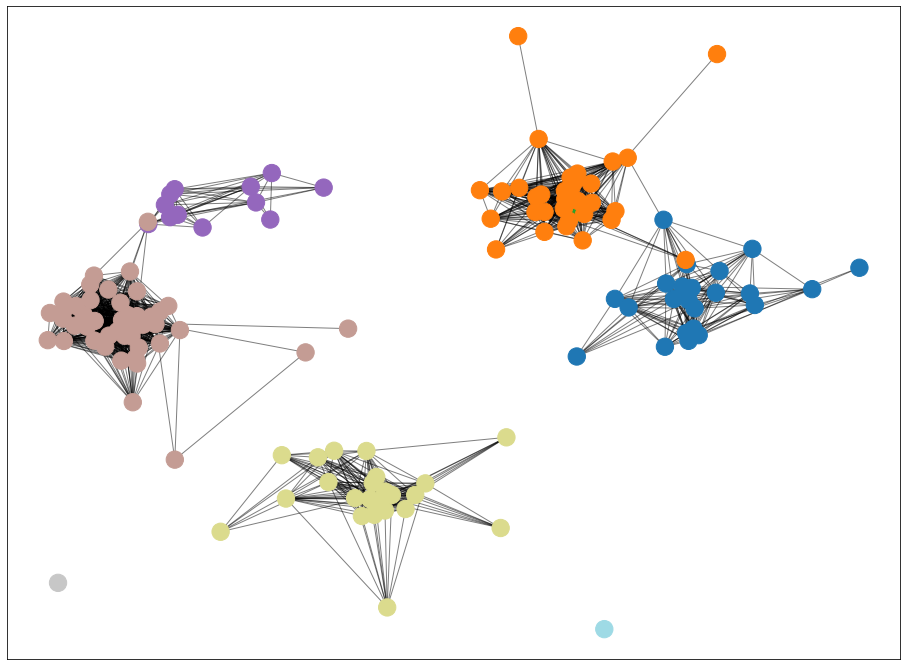

In [16]:
plt.figure(figsize=(16,12))
cmap = cm.get_cmap('tab20', max(partition.values()) +3)
nx.draw_networkx_nodes(rr_graph,pos1, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(rr_graph_iso, pos1, alpha=0.5)


No handles with labels found to put in legend.


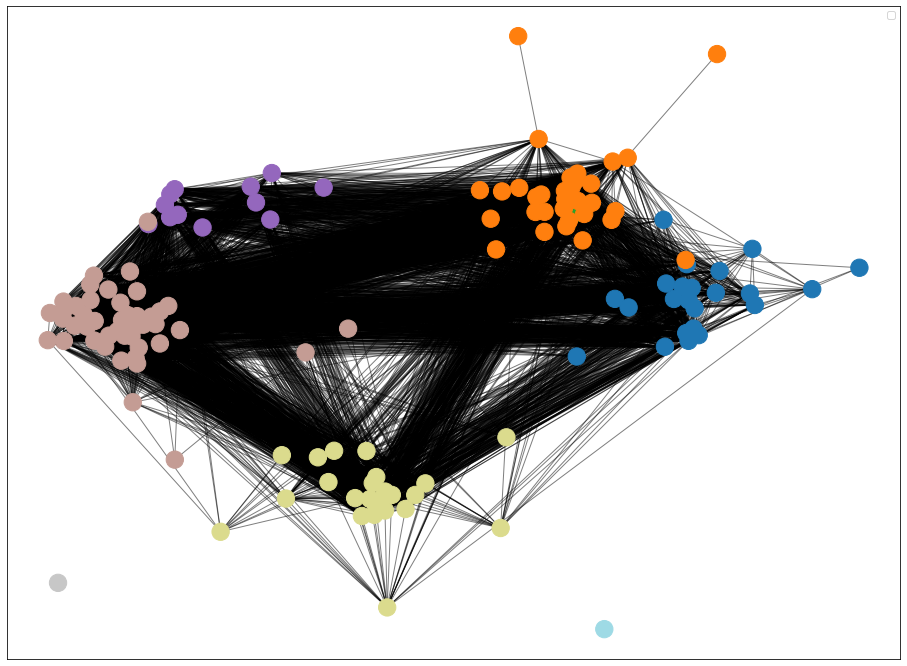

In [31]:
plt.figure(figsize=(16,12))
cmap = cm.get_cmap('tab20', max(partition.values()) +3)
nx.draw_networkx_nodes(rr_graph,pos1, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(rr_graph, pos1, alpha=0.5)
plt.legend()

In [30]:
%config Completer.use_jedi=False

ref_df = pd.DataFrame(data = list(partition.items()), columns=['File','Cluster'])
                      
ref_df
                     # {'File': list(rr_graph) 'cluster': list(partici)}

,File,Cluster
0,Yang Lou and Zhang-2018,0
1,Fang et al,1
2,Wang 2006,2
3,Lin et al,6
4,Yao et al,1
...,...,...
134,Lu et al-2018-EJOR,0
135,Zhang et al 2010-Revenue sharing with multiple...,4
136,Yan et al-2018-EJOR,0
137,Chen et al 2017,1


In [ ]:
ref_df

In [26]:
list(partition.keys())[:10]

['Yang Lou and Zhang-2018',
 'Fang et al',
 'Wang 2006',
 'Lin et al',
 'Yao et al',
 'Dana and  Spier 2001-Revenue Sharing and Vertical Control in the Video Rental Industry',
 'Wang and Shin 2014',
 'check-Li et al 2009-Supply chain coordination and decision making under consignment contract with revenue sharing',
 'RAZA 2018',
 'He et al 2017']

In [86]:
a=rr_graph.edge_attr_dict_factory()
a

{}

In [100]:
ed = list(rr_graph.edges())
Counter(rr_graph.get_edge_data(*e)['weight'] for e in ed)

Counter({1: 2436,
         2: 1498,
         4: 385,
         15: 6,
         3: 759,
         68: 1,
         5: 230,
         7: 56,
         6: 97,
         8: 33,
         27: 1,
         14: 3,
         11: 6,
         13: 3,
         21: 2,
         9: 8,
         17: 3,
         10: 13,
         31: 1,
         25: 1,
         20: 2,
         12: 4,
         16: 2,
         82: 1})

nx.__version__

In [77]:
np.vstack(list(pos.values())).min(axis=0),np.vstack(list(pos.values())).max(axis=0)

(array([-0.09639341, -1.        ]), array([0.96773457, 0.19769064]))

In [102]:
np.cos(3)

-0.9899924966004454

In [113]:
partition.__repr__()[:400]

"{'Yang Lou and Zhang-2018': 0, 'Fang et al': 6, 'Wang 2006': 2, 'Lin et al': 3, 'Yao et al': 6, 'Dana and  Spier 2001-Revenue Sharing and Vertical Control in the Video Rental Industry': 6, 'Wang and Shin 2014': 0, 'check-Li et al 2009-Supply chain coordination and decision making under consignment contract with revenue sharing': 6, 'RAZA 2018': 3, 'He et al 2017': 3, 'Choi and He-2019': 3, 'Cachon"

In [114]:
ea

0.7853981633974483

In [116]:
list(rr_graph.edges())[:5]

[('Yang Lou and Zhang-2018', 'Fang et al'),
 ('Yang Lou and Zhang-2018', 'Lin et al'),
 ('Yang Lou and Zhang-2018', 'Yao et al'),
 ('Yang Lou and Zhang-2018', 'Wang and Shin 2014'),
 ('Yang Lou and Zhang-2018',
  'check-Li et al 2009-Supply chain coordination and decision making under consignment contract with revenue sharing')]

In [120]:
dir(rr_graph)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

ght': 1},
 ('He et al 2017', 'de Matta et al 2014'): {'id': 1811, 'weight': 1},
 ('He et al 2017', 'Zhang et al 2010'): {'id': 1812, 'weight': 1},
 ('He et al 2017',
  'Govindan and Popiuc 2014-Reverse supply chain coordination by revenue sharing contract'): {'id': 1813,
  'weight': 1},
 ('He et al 2017',
  'check-Hu and Feng 2017-Optimization and coordination of supply chain with revenue sharing'): {'id': 1814,
  'weight': 2},
 ('He et al 2017',
  'Katok and Wu-2009-Contracting_in_Supply_Chains_A_Laboratory_Investigation'): {'id': 1815,
  'weight': 1},
 ('He et al 2017',
  'check-Pan et al 2010-Revenue-sharing versus wholesale price mechanisms under different channel structures'): {'id': 1816,
  'weight': 1},
 ('He et al 2017',
  'Chakraborty et al 2015-Coordination and competition in a common retailer'): {'id': 1817,
  'weight': 1},
 ('He et al 2017', 'Wen et al'): {'id': 1818, 'weight': 3},
 ('He et al 2017', 'Liu li et al 2017'): {'id': 1819, 'weight': 1},
 ('He et al 2017',
  'Zha

In [23]:
len(list(rr_refs.keys()))

139

In [22]:
len(list(rr_graph))

139